**import libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.utils import to_categorical

**Load Cifar10**

In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Define class labels
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 [==============================] - 6s 0us/step


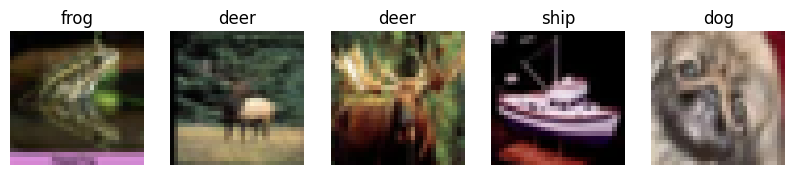

In [3]:
# Display five random images
num_images = 5
random_indices = np.random.randint(0, x_train.shape[0], num_images)

plt.figure(figsize=(10, 2))
for i, index in enumerate(random_indices):
    plt.subplot(1, num_images, i+1)
    plt.imshow(x_train[index])
    plt.title(class_labels[y_train[index][0]])
    plt.axis('off')

plt.show()

**Preprocess and split data to Test val Train**

In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Split the data into training, validation, and test sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=10000, random_state=42)

In [5]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (40000, 32, 32, 3)
y_train shape: (40000, 10)
x_val shape: (10000, 32, 32, 3)
y_val shape: (10000, 10)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 10)


**Train With different Optimizer**

In [6]:
# Define the optimizers
optimizers = {
    'Adam': Adam(),
    'SGD': SGD(),
    'RMSprop': RMSprop()
}

In [7]:
# Train the model with each optimizer
history = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}

for optimizer_name, optimizer in optimizers.items():
    # Reset the model
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    print(f'Training model with {optimizer_name} optimizer')
    h = model.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_val, y_val), verbose=1)
    history[optimizer_name] = h.history

    # Evaluate the model
    y_pred = model.predict(x_test)
    y_pred = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    precision_scores[optimizer_name] = precision_score(y_true, y_pred, average='macro')
    recall_scores[optimizer_name] = recall_score(y_true, y_pred, average='macro')
    f1_scores[optimizer_name] = f1_score(y_true, y_pred, average='macro')


Training model with Adam optimizer
Epoch 1/20
625/625 [==============================] - 21s 14ms/step - loss: 1.7003 - accuracy: 0.3735 - val_loss: 1.3180 - val_accuracy: 0.5199
Epoch 2/20
625/625 [==============================] - 7s 11ms/step - loss: 1.2850 - accuracy: 0.5361 - val_loss: 1.1352 - val_accuracy: 0.5948
Epoch 3/20
625/625 [==============================] - 7s 12ms/step - loss: 1.0659 - accuracy: 0.6201 - val_loss: 0.9187 - val_accuracy: 0.6761
Epoch 4/20
625/625 [==============================] - 7s 11ms/step - loss: 0.9212 - accuracy: 0.6755 - val_loss: 0.8676 - val_accuracy: 0.6970
Epoch 5/20
625/625 [==============================] - 7s 12ms/step - loss: 0.8275 - accuracy: 0.7082 - val_loss: 0.7850 - val_accuracy: 0.7242
Epoch 6/20
625/625 [==============================] - 7s 12ms/step - loss: 0.7609 - accuracy: 0.7329 - val_loss: 0.7546 - val_accuracy: 0.7337
Epoch 7/20
625/625 [==============================] - 7s 11ms/step - loss: 0.7043 - accuracy: 0.7526 - val

In [8]:
# Print precision, recall, and F1 score for each optimizer
for optimizer_name in optimizers:
    print(f'Optimizer: {optimizer_name}')
    print(f'Precision: {precision_scores[optimizer_name]}')
    print(f'Recall: {recall_scores[optimizer_name]}')
    print(f'F1 Score: {f1_scores[optimizer_name]}')
    print()

Optimizer: Adam
Precision: 0.7863752434214992
Recall: 0.7865
F1 Score: 0.7853666543504559

Optimizer: SGD
Precision: 0.6501601751325873
Recall: 0.6547
F1 Score: 0.648690924950683

Optimizer: RMSprop
Precision: 0.7520145980048323
Recall: 0.7307
F1 Score: 0.7296098265142222



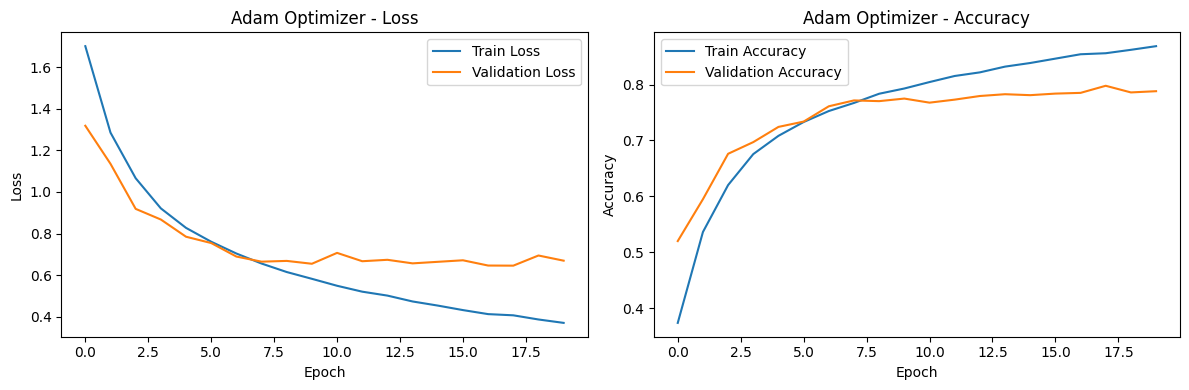

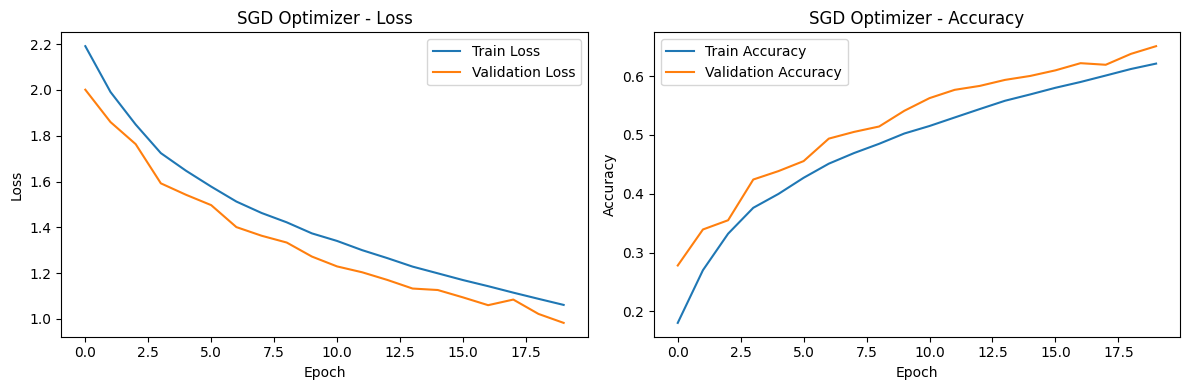

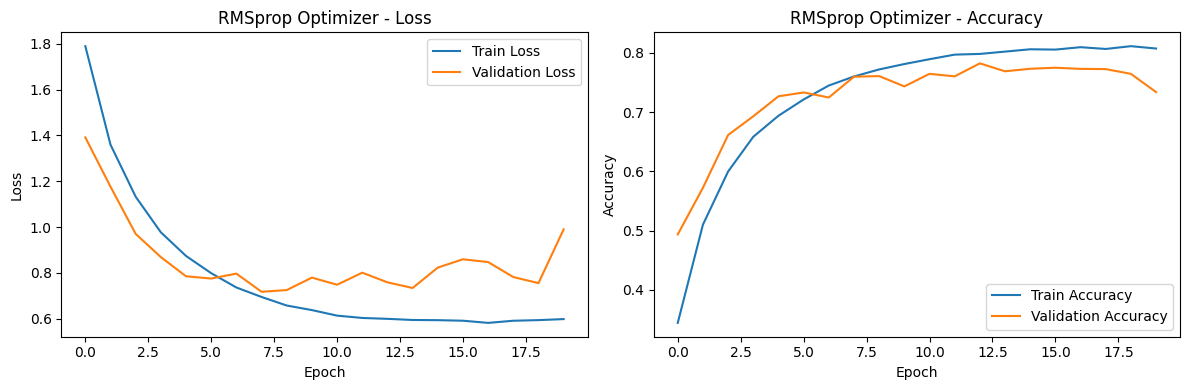

In [10]:
# Plot the loss and accuracy curves for each optimizer
for optimizer_name, h in history.items():
    plt.figure(figsize=(12, 4))
    
    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(h['loss'], label='Train Loss')
    plt.plot(h['val_loss'], label='Validation Loss')
    plt.title(f'{optimizer_name} Optimizer - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(h['accuracy'], label='Train Accuracy')
    plt.plot(h['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{optimizer_name} Optimizer - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
